In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [4]:
df1= pd.read_csv('/content/Hair Salon_PCA.csv')

In [5]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.6
1.3.5
0.11.2


In [6]:
df1.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [7]:
df1.tail()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4
99,100,7.9,3.0,4.4,5.1,5.9,4.2,4.8,9.7,5.7,3.4,3.5,6.4


In [8]:
df1.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,29.011492,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,1.000000,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,25.750000,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,50.500000,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,75.250000,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,100.000000,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


In [9]:
df1.shape

(100, 13)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [11]:
df1.isnull().sum() 

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [13]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [14]:
df1.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

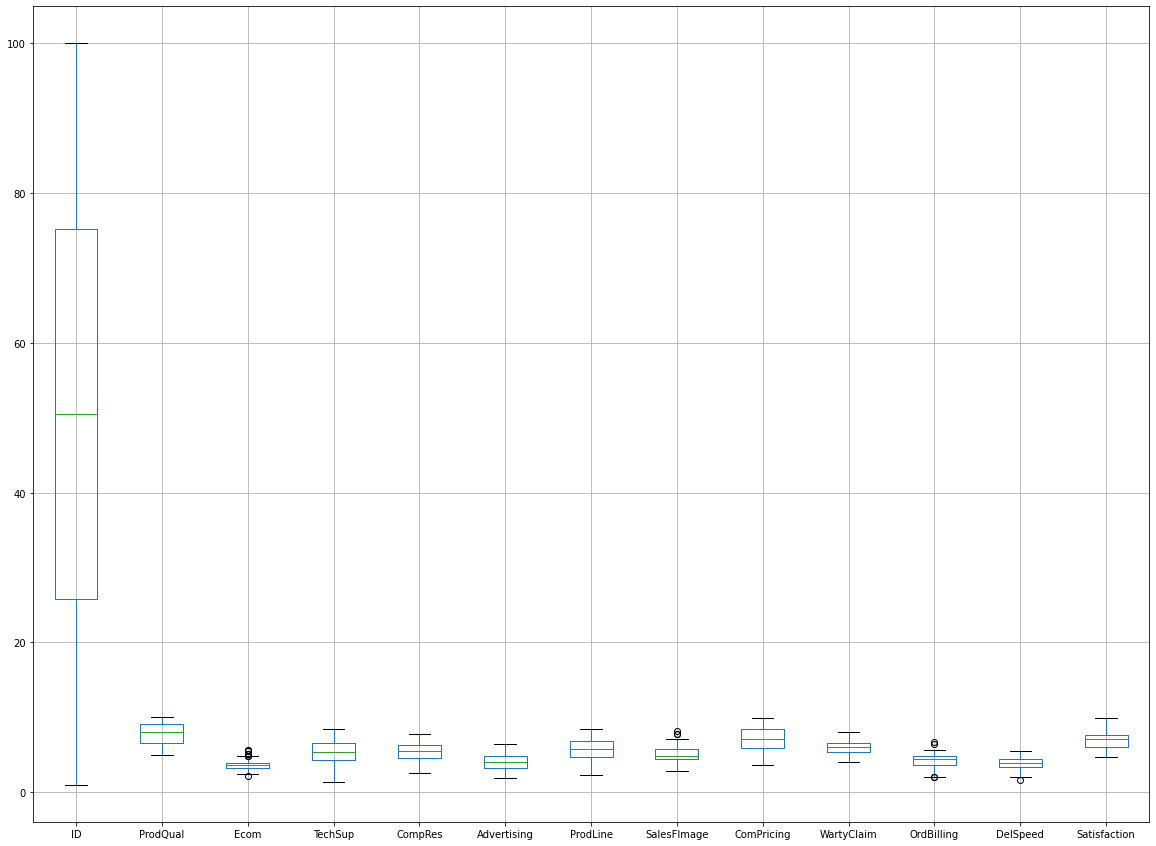

In [15]:
df1.boxplot(figsize=(20,15))

Data Visualization
Univariate Analysis

In [18]:
df1.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [22]:
listcolumns = ['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction']

In [27]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    print('')
    print('')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df1[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

Description of ID
----------------------------------------------------------------------------
count    100.000000
mean      50.500000
std       29.011492
min        1.000000
25%       25.750000
50%       50.500000
75%       75.250000
max      100.000000
Name: ID, dtype: float64 

Distribution of ID
----------------------------------------------------------------------------


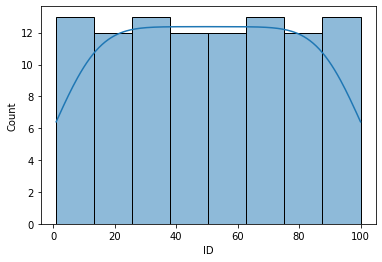

BoxPlot of ID
----------------------------------------------------------------------------


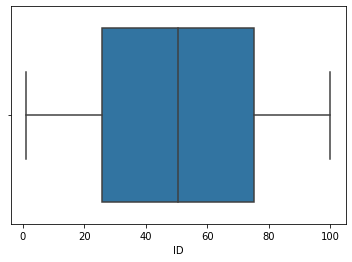

Description of ProdQual
----------------------------------------------------------------------------
count    100.000000
mean       7.810000
std        1.396279
min        5.000000
25%        6.575000
50%        8.000000
75%        9.100000
max       10.000000
Name: ProdQual, dtype: float64 

Distribution of ProdQual
----------------------------------------------------------------------------


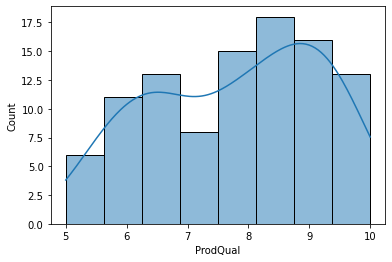

BoxPlot of ProdQual
----------------------------------------------------------------------------


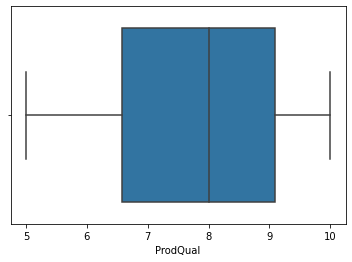

Description of Ecom
----------------------------------------------------------------------------
count    100.000000
mean       3.672000
std        0.700516
min        2.200000
25%        3.275000
50%        3.600000
75%        3.925000
max        5.700000
Name: Ecom, dtype: float64 

Distribution of Ecom
----------------------------------------------------------------------------


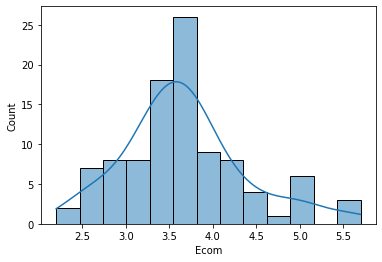

BoxPlot of Ecom
----------------------------------------------------------------------------


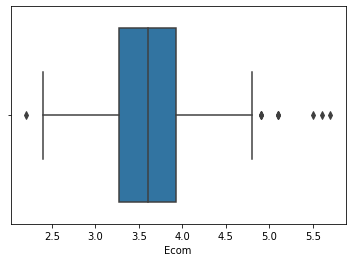

Description of TechSup
----------------------------------------------------------------------------
count    100.000000
mean       5.365000
std        1.530457
min        1.300000
25%        4.250000
50%        5.400000
75%        6.625000
max        8.500000
Name: TechSup, dtype: float64 

Distribution of TechSup
----------------------------------------------------------------------------


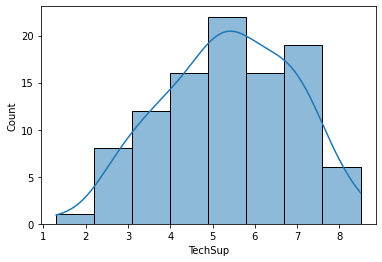

BoxPlot of TechSup
----------------------------------------------------------------------------


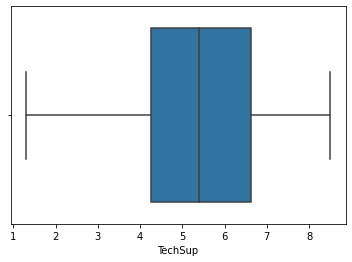

Description of CompRes
----------------------------------------------------------------------------
count    100.000000
mean       5.442000
std        1.208403
min        2.600000
25%        4.600000
50%        5.450000
75%        6.325000
max        7.800000
Name: CompRes, dtype: float64 

Distribution of CompRes
----------------------------------------------------------------------------


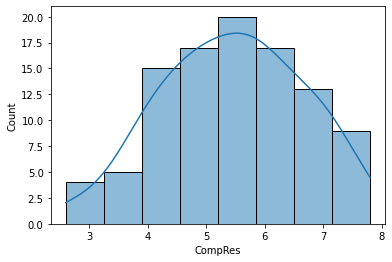

BoxPlot of CompRes
----------------------------------------------------------------------------


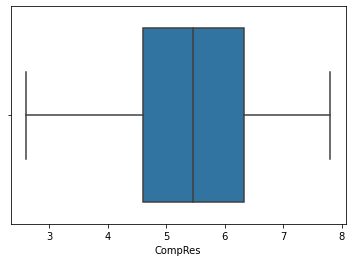

Description of Advertising
----------------------------------------------------------------------------
count    100.000000
mean       4.010000
std        1.126943
min        1.900000
25%        3.175000
50%        4.000000
75%        4.800000
max        6.500000
Name: Advertising, dtype: float64 

Distribution of Advertising
----------------------------------------------------------------------------


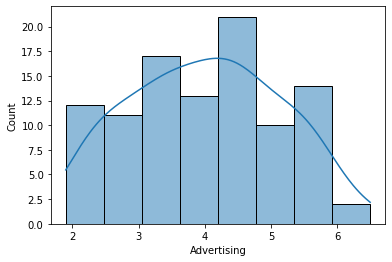

BoxPlot of Advertising
----------------------------------------------------------------------------


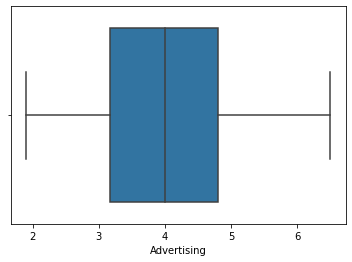

Description of ProdLine
----------------------------------------------------------------------------
count    100.000000
mean       5.805000
std        1.315285
min        2.300000
25%        4.700000
50%        5.750000
75%        6.800000
max        8.400000
Name: ProdLine, dtype: float64 

Distribution of ProdLine
----------------------------------------------------------------------------


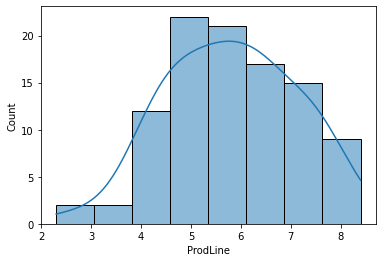

BoxPlot of ProdLine
----------------------------------------------------------------------------


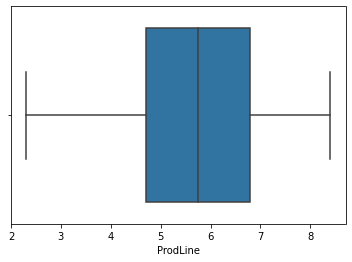

Description of SalesFImage
----------------------------------------------------------------------------
count    100.00000
mean       5.12300
std        1.07232
min        2.90000
25%        4.50000
50%        4.90000
75%        5.80000
max        8.20000
Name: SalesFImage, dtype: float64 

Distribution of SalesFImage
----------------------------------------------------------------------------


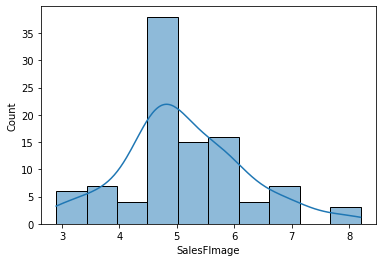

BoxPlot of SalesFImage
----------------------------------------------------------------------------


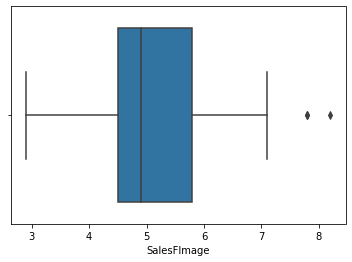

Description of ComPricing
----------------------------------------------------------------------------
count    100.000000
mean       6.974000
std        1.545055
min        3.700000
25%        5.875000
50%        7.100000
75%        8.400000
max        9.900000
Name: ComPricing, dtype: float64 

Distribution of ComPricing
----------------------------------------------------------------------------


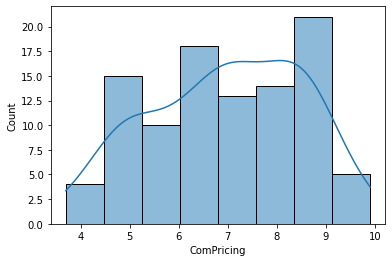

BoxPlot of ComPricing
----------------------------------------------------------------------------


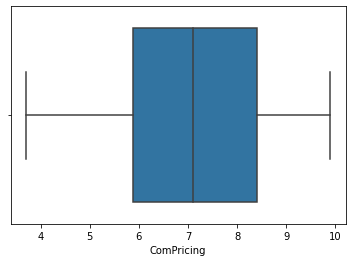

Description of WartyClaim
----------------------------------------------------------------------------
count    100.000000
mean       6.043000
std        0.819738
min        4.100000
25%        5.400000
50%        6.100000
75%        6.600000
max        8.100000
Name: WartyClaim, dtype: float64 

Distribution of WartyClaim
----------------------------------------------------------------------------


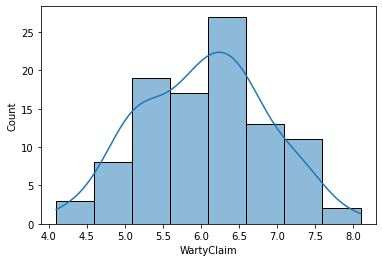

BoxPlot of WartyClaim
----------------------------------------------------------------------------


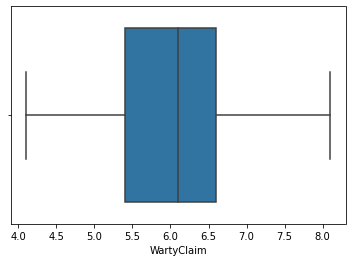

Description of OrdBilling
----------------------------------------------------------------------------
count    100.00000
mean       4.27800
std        0.92884
min        2.00000
25%        3.70000
50%        4.40000
75%        4.80000
max        6.70000
Name: OrdBilling, dtype: float64 

Distribution of OrdBilling
----------------------------------------------------------------------------


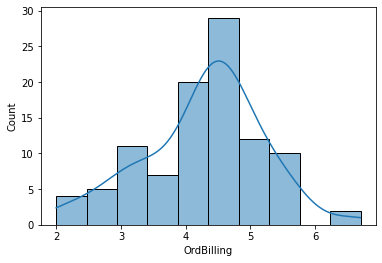

BoxPlot of OrdBilling
----------------------------------------------------------------------------


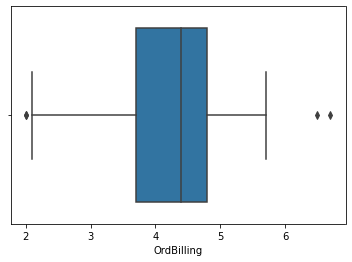

Description of DelSpeed
----------------------------------------------------------------------------
count    100.000000
mean       3.886000
std        0.734437
min        1.600000
25%        3.400000
50%        3.900000
75%        4.425000
max        5.500000
Name: DelSpeed, dtype: float64 

Distribution of DelSpeed
----------------------------------------------------------------------------


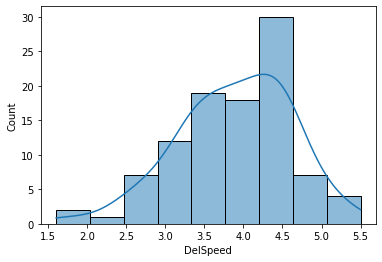

BoxPlot of DelSpeed
----------------------------------------------------------------------------


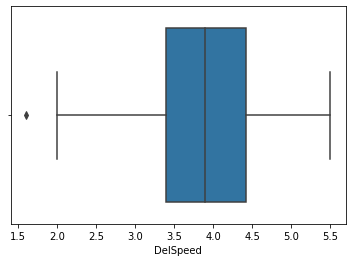

Description of Satisfaction
----------------------------------------------------------------------------
count    100.000000
mean       6.918000
std        1.191839
min        4.700000
25%        6.000000
50%        7.050000
75%        7.625000
max        9.900000
Name: Satisfaction, dtype: float64 

Distribution of Satisfaction
----------------------------------------------------------------------------


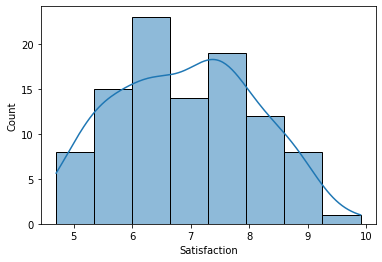

BoxPlot of Satisfaction
----------------------------------------------------------------------------


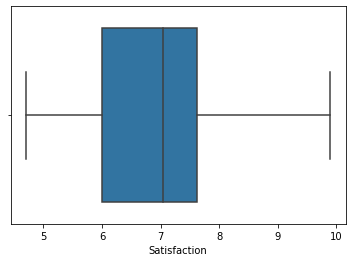

In [28]:
for x in listcolumns:
    univaranalysis(x,20)

Multi variate Analysis


Bivariate Analysis

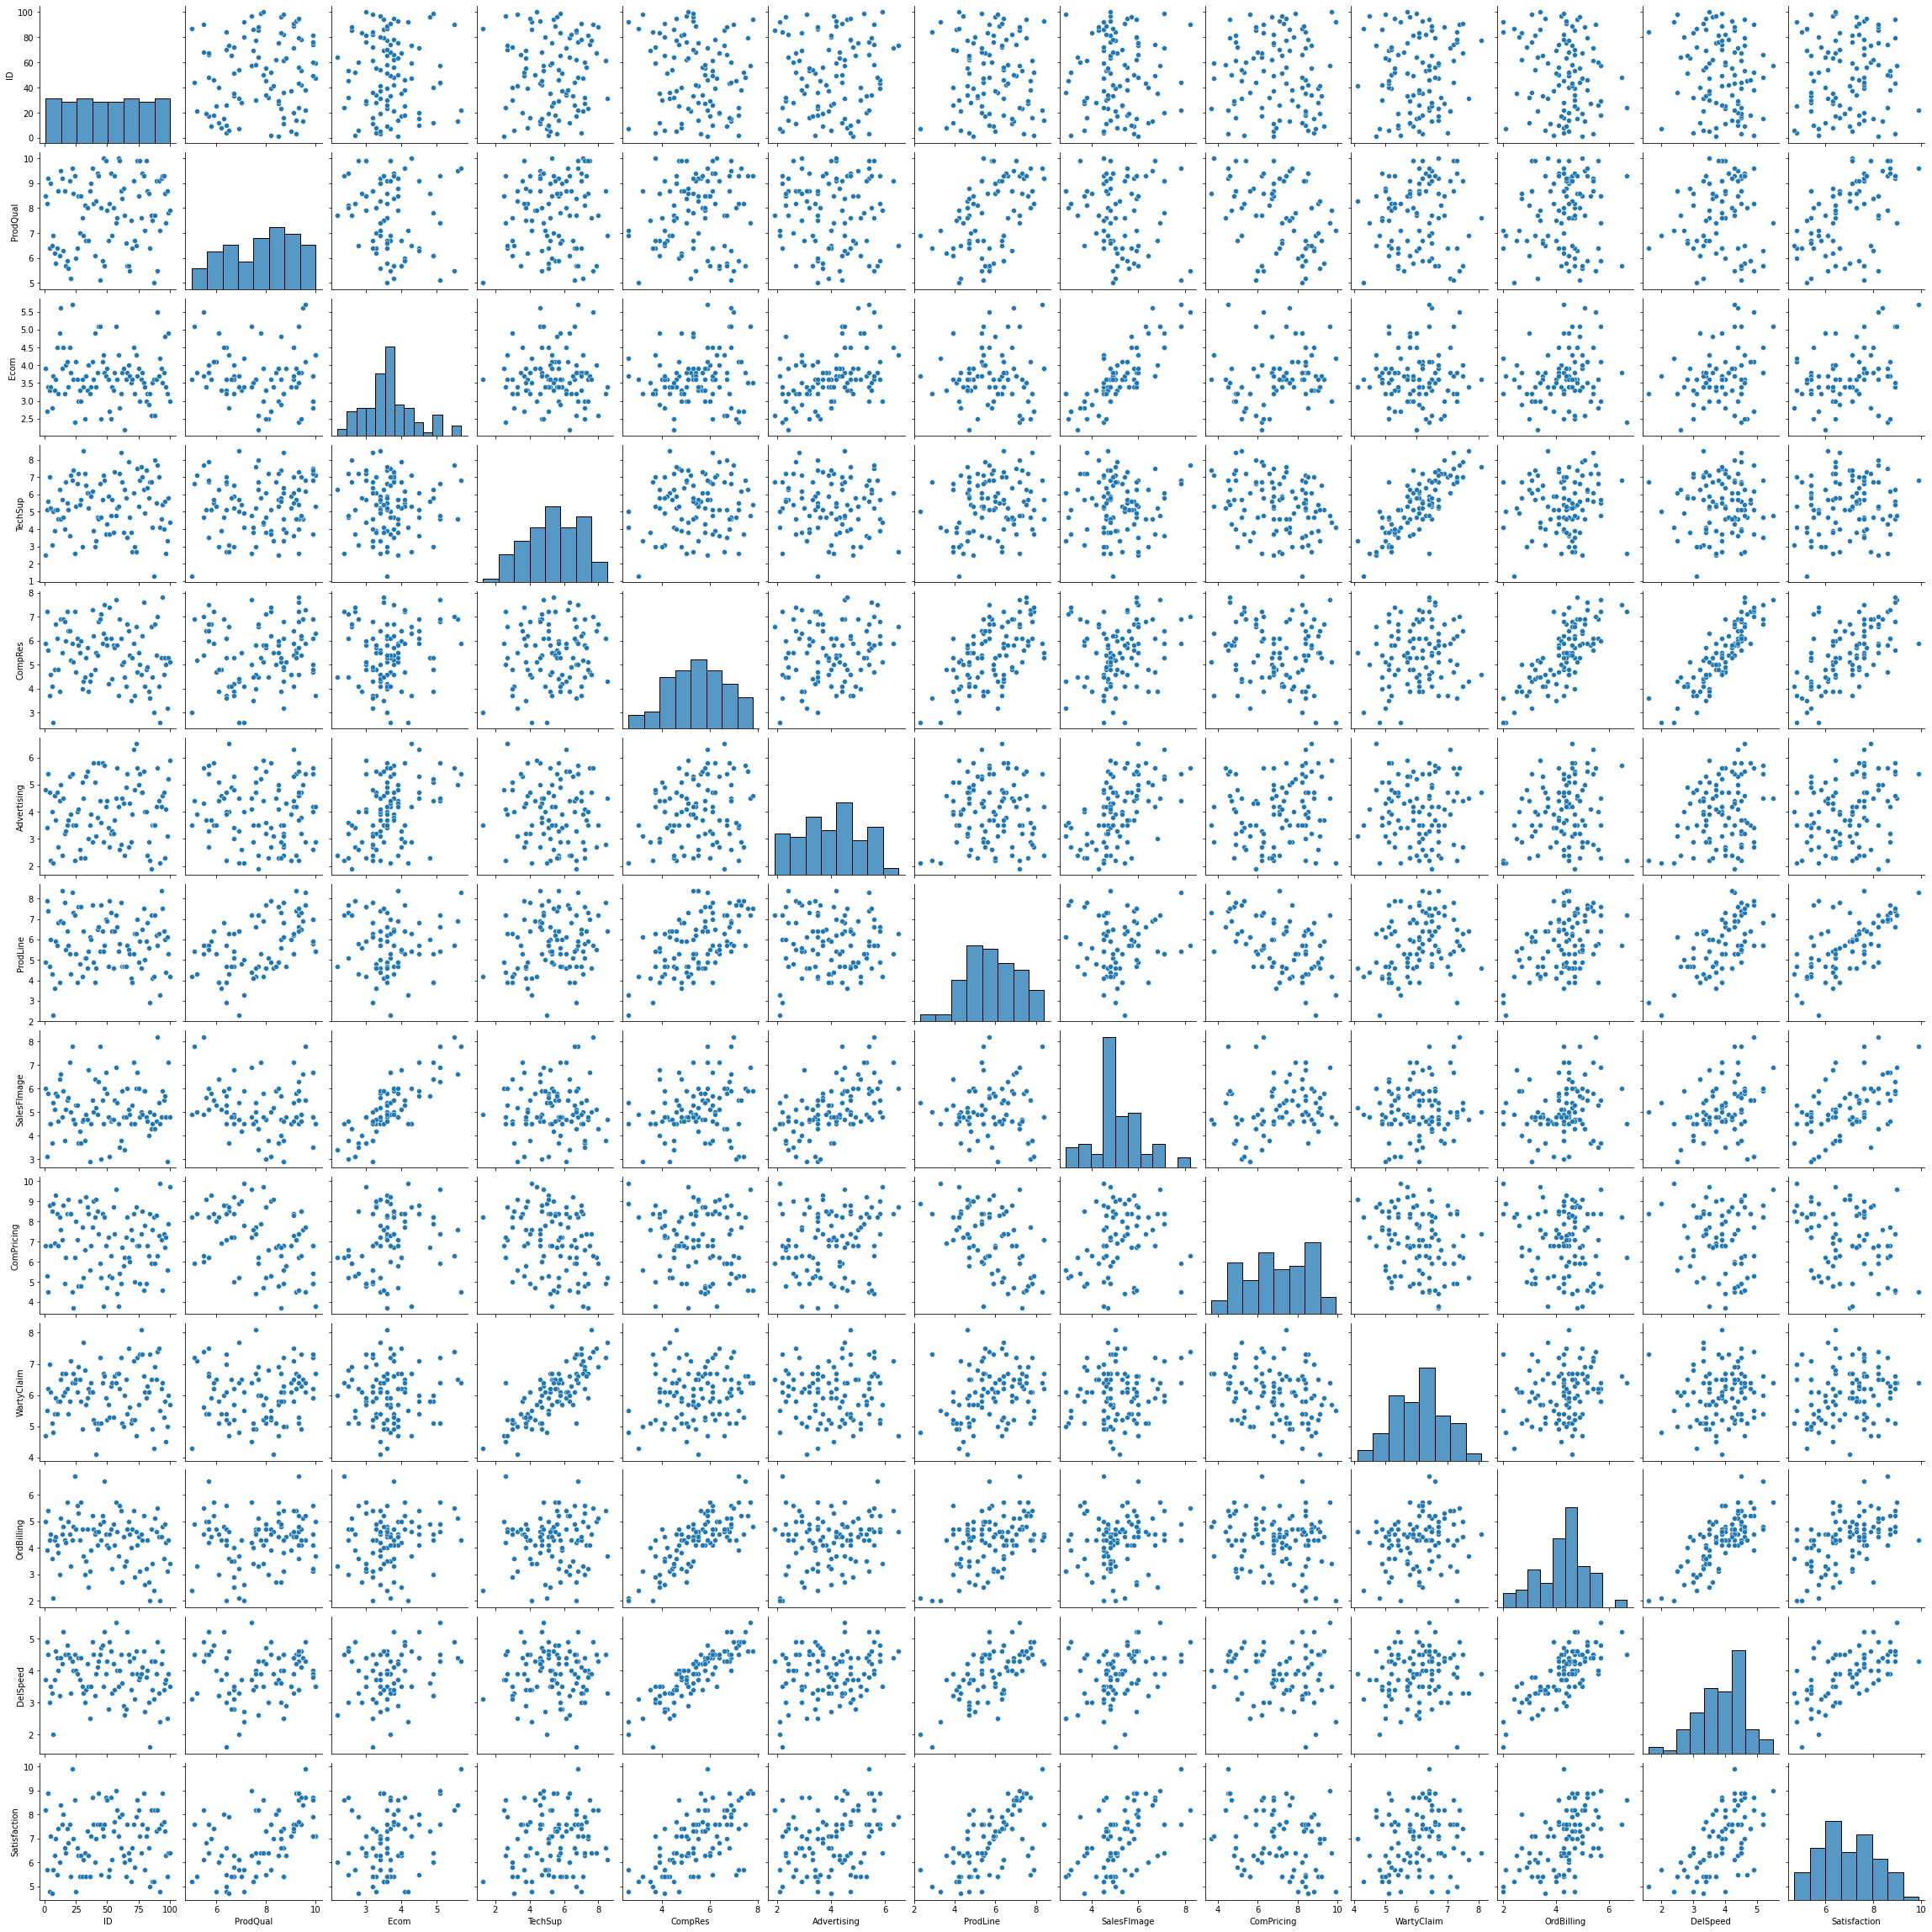

In [29]:
sns.pairplot(df1)

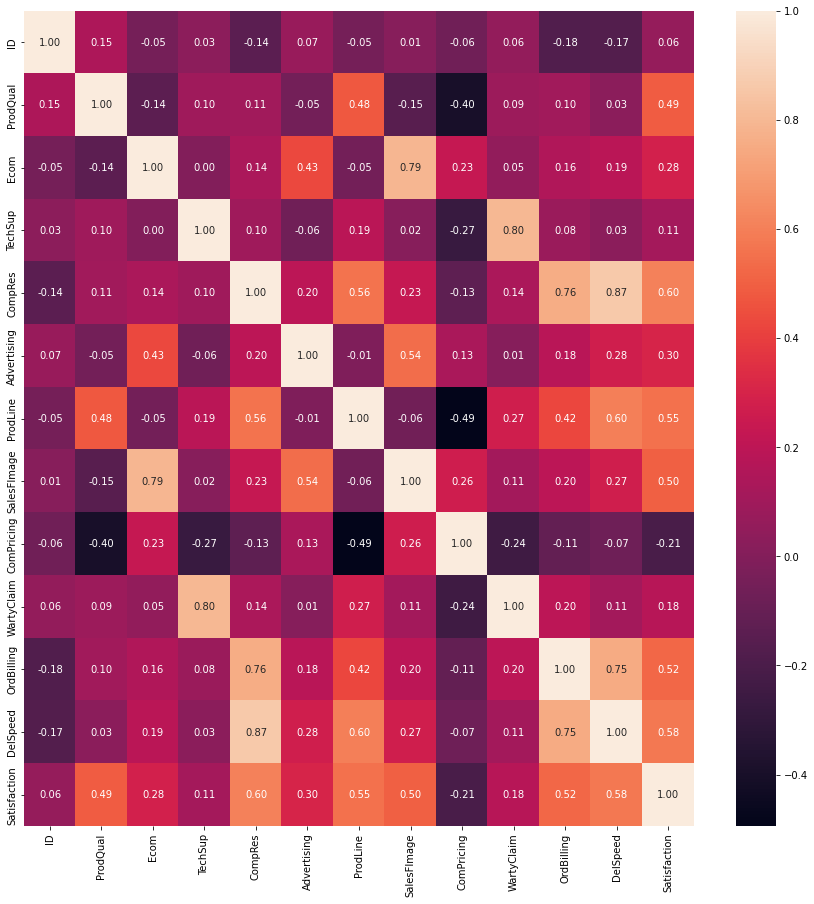

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,fmt=".2f");

In [31]:
print('The variances of the numeric variables are given below')
df1.var()

The variances of the numeric variables are given below


ID              841.666667
ProdQual          1.949596
Ecom              0.490723
TechSup           2.342298
CompRes           1.460238
Advertising       1.270000
ProdLine          1.729975
SalesFImage       1.149870
ComPricing        2.387196
WartyClaim        0.671971
OrdBilling        0.862743
DelSpeed          0.539398
Satisfaction      1.420481
dtype: float64

In [33]:
# Drop ID & Satisfaction column
df2 = df1.drop(['ID','Satisfaction'], axis =1)
df2.head(10)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
5,6.5,2.8,3.1,4.1,4.0,4.3,3.7,8.5,5.1,3.6,3.3
6,6.9,3.7,5.0,2.6,2.1,2.3,5.4,8.9,4.8,2.1,2.0
7,6.2,3.3,3.9,4.8,4.6,3.6,5.1,6.9,5.4,4.3,3.7
8,5.8,3.6,5.1,6.7,3.7,5.9,5.8,9.3,5.9,4.4,4.6
9,6.4,4.5,5.1,6.1,4.7,5.7,5.7,8.4,5.4,4.1,4.4


In [54]:
# scaling & standardising the data
from scipy.stats import zscore
df3=df2.apply(zscore)
df3.head(10)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220
5,-0.942934,-1.251067,-1.487406,-1.116151,-0.008918,-1.150003,-1.333715,0.992643,-1.156163,-0.733620,-0.801910
6,-0.655015,0.040172,-0.239692,-2.363712,-1.703389,-2.678246,0.259620,1.252837,-1.523977,-2.356674,-2.580890
7,-1.158873,-0.533712,-0.962053,-0.533956,0.526178,-1.684888,-0.021557,-0.048136,-0.788348,0.023805,-0.254531
8,-1.446792,-0.103299,-0.174023,1.046288,-0.276466,0.072592,0.634522,1.513032,-0.175325,0.132008,0.977071
9,-1.014914,1.187940,-0.174023,0.547263,0.615361,-0.080233,0.540797,0.927594,-0.788348,-0.192602,0.703381


In [35]:
# S.D of scaled data=1
df3.std()

ProdQual       1.005038
Ecom           1.005038
TechSup        1.005038
CompRes        1.005038
Advertising    1.005038
ProdLine       1.005038
SalesFImage    1.005038
ComPricing     1.005038
WartyClaim     1.005038
OrdBilling     1.005038
DelSpeed       1.005038
dtype: float64

In [36]:
#mean of scaled data =0
df3.mean()

ProdQual       9.188483e-16
Ecom           1.011413e-15
TechSup        1.029177e-15
CompRes       -1.432188e-16
Advertising   -6.061818e-16
ProdLine       2.531308e-16
SalesFImage    6.178391e-16
ComPricing    -7.105427e-16
WartyClaim    -1.247891e-15
OrdBilling     4.751755e-16
DelSpeed       4.241052e-16
dtype: float64

In [37]:
corrMatrix = df3.corr()
print (corrMatrix)

             ProdQual      Ecom   TechSup   CompRes  Advertising  ProdLine  \
ProdQual     1.000000 -0.137163  0.095600  0.106370    -0.053473  0.477493   
Ecom        -0.137163  1.000000  0.000867  0.140179     0.429891 -0.052688   
TechSup      0.095600  0.000867  1.000000  0.096657    -0.062870  0.192625   
CompRes      0.106370  0.140179  0.096657  1.000000     0.196917  0.561417   
Advertising -0.053473  0.429891 -0.062870  0.196917     1.000000 -0.011551   
ProdLine     0.477493 -0.052688  0.192625  0.561417    -0.011551  1.000000   
SalesFImage -0.151813  0.791544  0.016991  0.229752     0.542204 -0.061316   
ComPricing  -0.401282  0.229462 -0.270787 -0.127954     0.134217 -0.494948   
WartyClaim   0.088312  0.051898  0.797168  0.140408     0.010792  0.273078   
OrdBilling   0.104303  0.156147  0.080102  0.756869     0.184236  0.424408   
DelSpeed     0.027718  0.191636  0.025441  0.865092     0.275863  0.601850   

             SalesFImage  ComPricing  WartyClaim  OrdBilling  D

In [38]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(df3.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01]
 [ 4.82316579e-01 -5.32200387e-02  1.94571168e-01  5.67087831e-

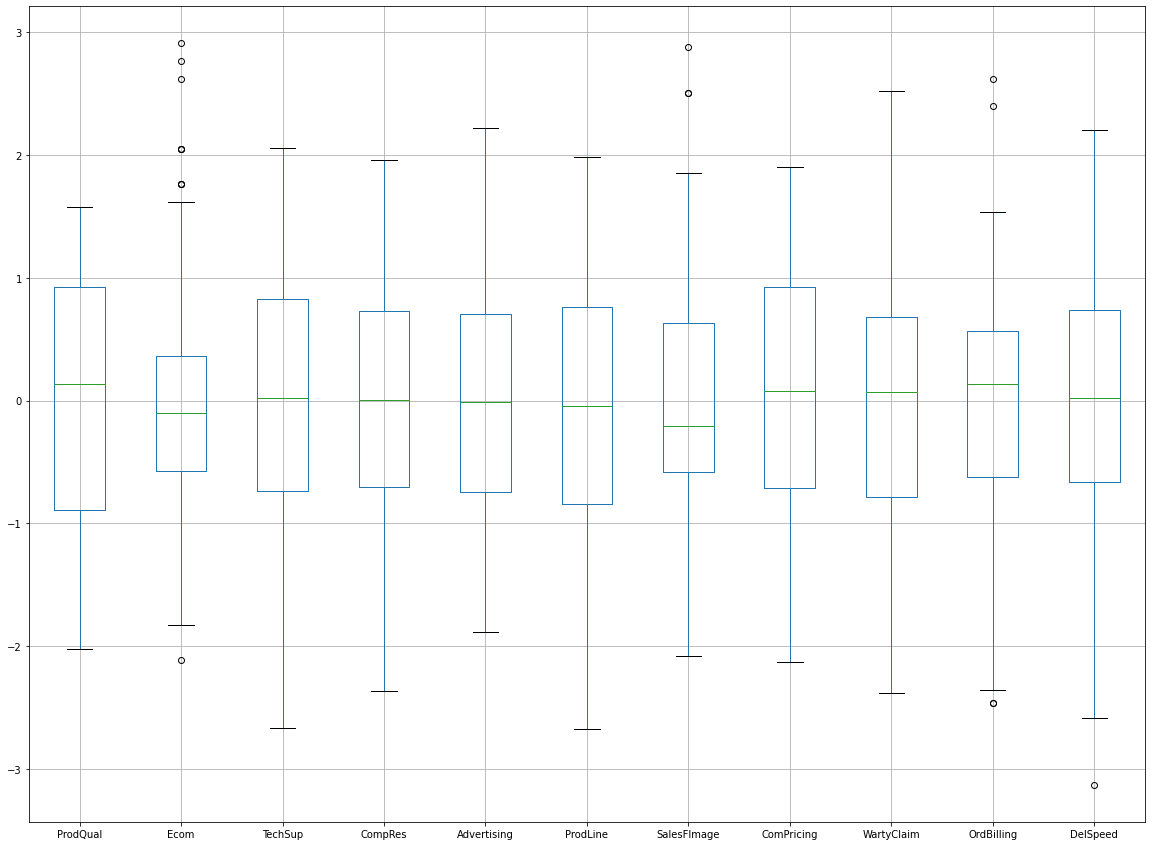

In [39]:
df3.boxplot(figsize=(20,15))

In [40]:
df3.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,9.188483e-16,1.011413e-15,1.029177e-15,-1.432188e-16,-6.061818e-16,2.531308e-16,6.178391e-16,-7.105427e-16,-1.247891e-15,4.751755e-16,4.241052e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.022630e+00,-2.111893e+00,-2.669451e+00,-2.363712e+00,-1.881755e+00,-2.678246e+00,-2.083519e+00,-2.129693e+00,-2.382210e+00,-2.464877e+00,-3.128268e+00
25%,-8.889494e-01,-5.695798e-01,-7.322109e-01,-7.002976e-01,-7.446754e-01,-8.443545e-01,-5.839103e-01,-7.148848e-01,-7.883484e-01,-6.254166e-01,-6.650649e-01
50%,1.367614e-01,-1.032991e-01,2.298420e-02,6.653659e-03,-8.918268e-03,-4.202669e-02,-2.090080e-01,8.196131e-02,6.988470e-02,1.320083e-01,1.915825e-02
75%,9.285383e-01,3.629816e-01,8.274312e-01,7.343976e-01,7.045432e-01,7.603011e-01,6.345221e-01,9.275939e-01,6.829084e-01,5.648226e-01,7.375925e-01
max,1.576356e+00,2.909592e+00,2.058728e+00,1.961166e+00,2.220649e+00,1.982896e+00,2.883936e+00,1.903324e+00,2.521979e+00,2.620690e+00,2.208672e+00


In [42]:
 #Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [3.4615872  2.57666335 1.70805705 1.09753137 0.61557989 0.55745836
 0.40557389 0.09942123 0.13418341 0.249446   0.20560936]


Eigen Vectors 
 %s [[ 0.13378962 -0.31349802  0.06227164  0.6431362  -0.2316662  -0.56456996
   0.19164132  0.18279209  0.06659717 -0.13547311  0.0313281 ]
 [ 0.16595278  0.44650918 -0.23524791  0.27238033 -0.42228844  0.26325703
   0.05962621  0.06233863  0.28155772  0.12202642 -0.54251104]
 [ 0.15769263 -0.23096734 -0.61095105 -0.19339314  0.02395667 -0.10876896
  -0.01719992 -0.05192956 -0.3881709  -0.46470964 -0.35929961]
 [ 0.47068359  0.01944394  0.21035078 -0.20632037 -0.02865743 -0.02815231
  -0.0084996  -0.36253352  0.53467243 -0.51339754  0.09324751]
 [ 0.18373495  0.36366471 -0.08809705  0.31789448  0.80387024 -0.20056937
  -0.06306962 -0.08118684  0.03715799  0.05347713 -0.15468169]
 [ 0.38676517 -0.28478056  0.11627864  0.20290226 -0.11667416  0.09819533
  -0.60814755 -0.38507778 -0.23479794  0.3332071  -0.08415534]
 [ 0.2036696 

Perform PCA and export the data of the Principal Component scores into a data frame.


 Extract the eigenvalues, and eigenvectors

In [43]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 31.1542848   54.34425491  69.71676832  79.59455066  85.1347697
  90.15189496  93.80205993  96.04707397  97.89755822  99.10520892
 100.        ]


In [44]:
var_exp

[31.154284801237026,
 23.189970109084886,
 15.372513414611305,
 9.877782332815903,
 5.54021904464993,
 5.0171252531071975,
 3.6501649702912324,
 2.2450140428993857,
 1.850484252527727,
 1.2076506994143132,
 0.894791079361094]

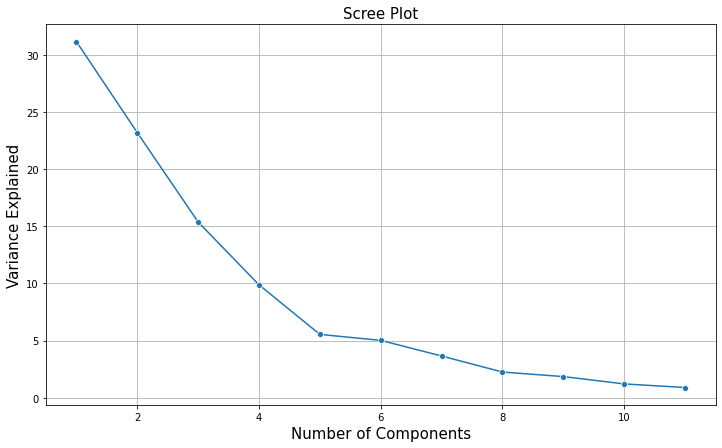

In [45]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [46]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 17 to 6)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df3)
df_pca.transpose() # Component output

array([[ 7.95507962e-02, -1.10096634e+00, -2.19706653e+00,
         1.56293289e+00,  7.67570385e-01,  2.90862177e+00,
         5.29319132e+00,  1.47659077e+00, -6.13947615e-01,
        -4.23660076e-01,  5.76252311e-01,  1.86757037e+00,
        -2.66029481e+00, -1.15437973e+00, -1.98252867e+00,
        -1.19534642e+00, -6.29210603e-01, -1.94912563e+00,
        -4.40654330e-01, -1.18679105e+00,  1.32903312e+00,
        -3.07501457e+00, -1.22862294e+00, -1.95215660e+00,
         2.77114349e-01, -3.38635080e-01, -1.76471720e+00,
         1.03510170e+00, -1.29479142e+00,  1.66262708e+00,
         1.44608491e-01,  2.11462740e+00,  1.06970726e+00,
        -1.09408090e-01,  1.80536022e+00,  2.12248520e+00,
         6.22051111e-01, -2.57411754e+00, -3.44966983e-01,
         1.21539637e+00,  1.25487586e+00,  1.67930781e-01,
        -1.82095895e+00, -2.33269255e+00, -8.73288881e-01,
        -1.65347263e+00, -1.03184895e+00, -3.12115015e+00,
        -1.07236222e+00, -7.97675229e-01,  1.98945764e+0

In [47]:
pca.explained_variance_

array([3.4615872 , 2.57666335, 1.70805705, 1.09753137, 0.61557989,
       0.55745836])

In [48]:
# Loading of each feature on the components
pca.components_

array([[-0.13378962, -0.16595278, -0.15769263, -0.47068359, -0.18373495,
        -0.38676517, -0.2036696 ,  0.15168864, -0.21293363, -0.43721774,
        -0.47308914],
       [-0.31349802,  0.44650918, -0.23096734,  0.01944394,  0.36366471,
        -0.28478056,  0.47069599,  0.4134565 , -0.19167191,  0.02639905,
         0.07305172],
       [ 0.06227164, -0.23524791, -0.61095105,  0.21035078, -0.08809705,
         0.11627864, -0.2413421 ,  0.05304529, -0.59856398,  0.16892981,
         0.23262477],
       [ 0.6431362 ,  0.27238033, -0.19339314, -0.20632037,  0.31789448,
         0.20290226,  0.22217722, -0.33354348, -0.18530205, -0.23685365,
        -0.1973299 ],
       [ 0.2316662 ,  0.42228844, -0.02395667,  0.02865743, -0.80387024,
         0.11667416,  0.20437283,  0.24892601, -0.03292706,  0.02675377,
        -0.03543294],
       [-0.56456996,  0.26325703, -0.10876896, -0.02815231, -0.20056937,
         0.09819533,  0.10497225, -0.70973595, -0.13983966, -0.11947974,
         0.029

In [49]:
pca.explained_variance_ratio_

array([0.31154285, 0.2318997 , 0.15372513, 0.09877782, 0.05540219,
       0.05017125])

In [50]:
#create a dataframe of component loading against each field and identify the pattern
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df3))
df_pca_loading.shape

(6, 11)

 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).


Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [51]:
df_pca_loading.head(6)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,-0.133790,-0.165953,-0.157693,-0.470684,-0.183735,-0.386765,-0.203670,0.151689,-0.212934,-0.437218,-0.473089
1,-0.313498,0.446509,-0.230967,0.019444,0.363665,-0.284781,0.470696,0.413457,-0.191672,0.026399,0.073052
2,0.062272,-0.235248,-0.610951,0.210351,-0.088097,0.116279,-0.241342,0.053045,-0.598564,0.168930,0.232625
3,0.643136,0.272380,-0.193393,-0.206320,0.317894,0.202902,0.222177,-0.333543,-0.185302,-0.236854,-0.197330
4,0.231666,0.422288,-0.023957,0.028657,-0.803870,0.116674,0.204373,0.248926,-0.032927,0.026754,-0.035433
5,-0.564570,0.263257,-0.108769,-0.028152,-0.200569,0.098195,0.104972,-0.709736,-0.139840,-0.119480,0.029800


In [52]:
pca.components_[0]

array([-0.13378962, -0.16595278, -0.15769263, -0.47068359, -0.18373495,
       -0.38676517, -0.2036696 ,  0.15168864, -0.21293363, -0.43721774,
       -0.47308914])

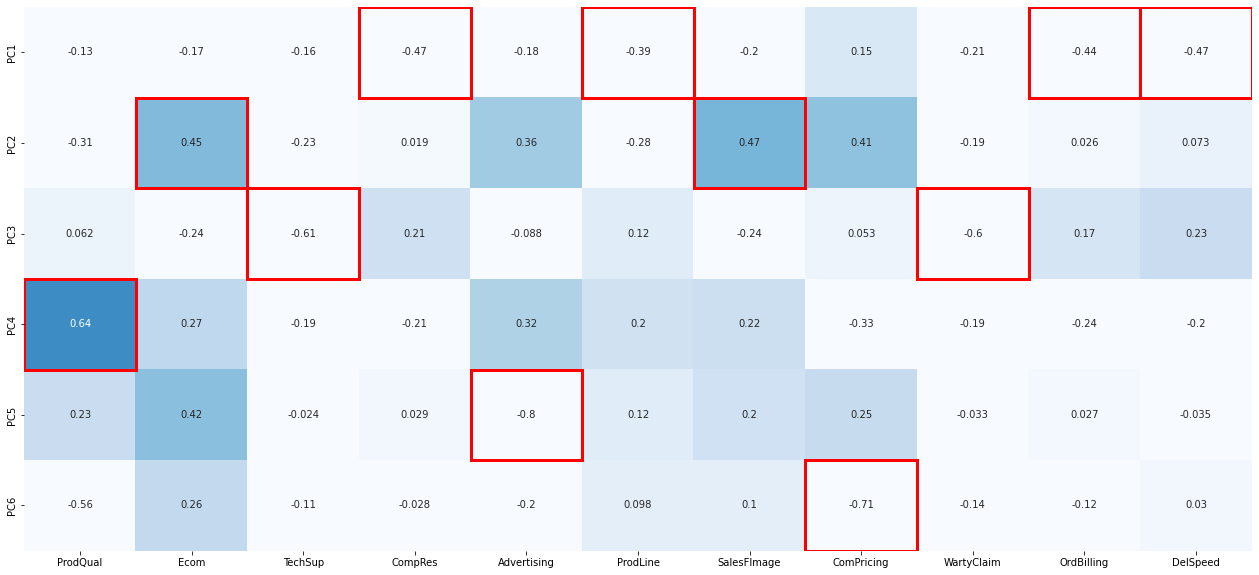

In [53]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))
